In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/mark/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

In [8]:
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column,["name"], column["type"])

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1} ['name'] INTEGER
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0} ['name'] TEXT
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0} ['name'] TEXT
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0} ['name'] FLOAT
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0} ['name'] FLOAT


In [12]:
columns = inspector.get_columns('station')
for column in columns:
    print(column,["name"], column["type"])

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1} ['name'] INTEGER
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0} ['name'] TEXT
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0} ['name'] TEXT
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0} ['name'] FLOAT
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0} ['name'] FLOAT
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0} ['name'] FLOAT


In [13]:
# Find the most recent date in the data set.
latest =session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest)

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print(year_ago)

('2017-08-23',)
2016-08-23


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Perform a query to retrieve the data and precipitation scores
m_prcp = session.query(Measurement.prcp , Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
m_prcp



[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

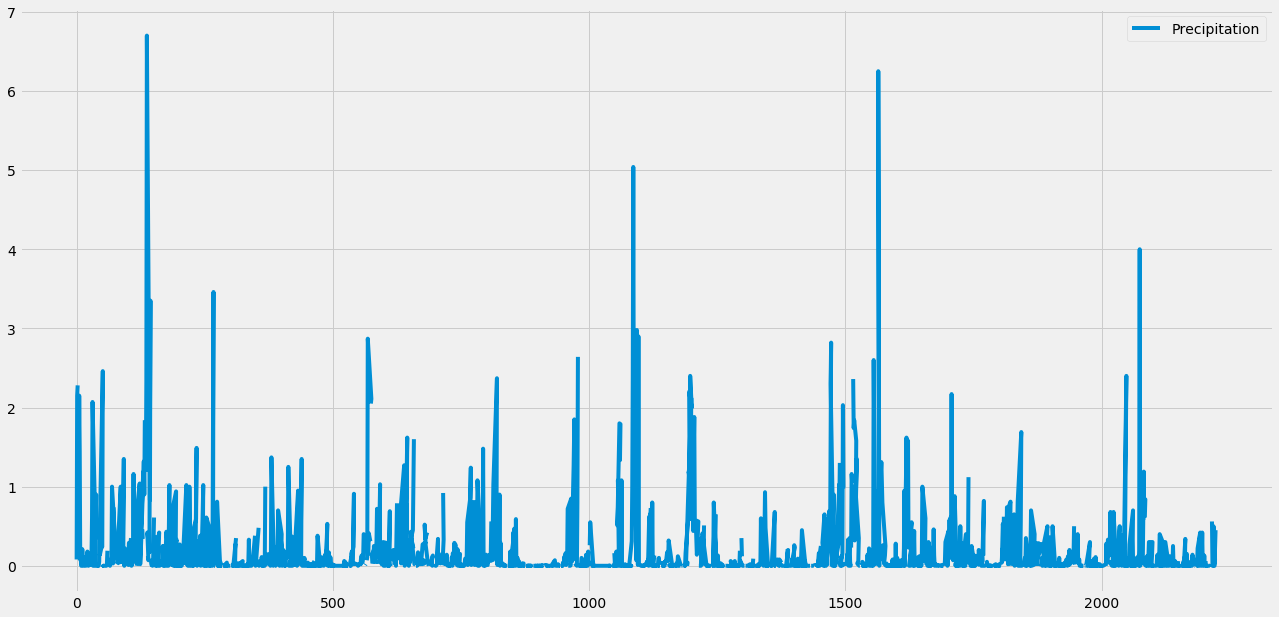

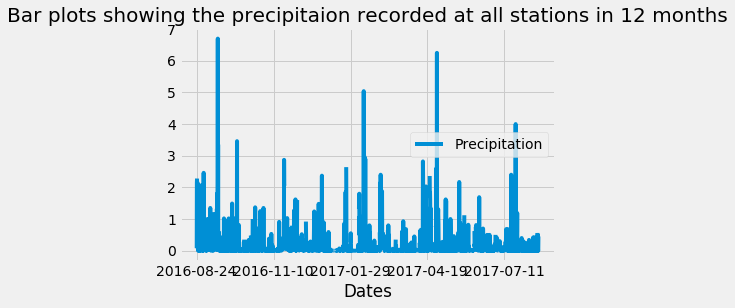

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(m_prcp, columns = ['Precipitation', 'Dates'])
df.set_index('Dates')

# Sort the dataframe by date
df_dates = df.sort_values(by = 'Dates')

# Use Pandas Plotting with Matplotlib to plot the data
df_dates.plot(figsize=(20,10))
df_dates.plot(x = 'Dates' , grid = True)

plt.title("Bar plots showing the precipitaion recorded at all stations in 12 months" , size = 20)
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_dates.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(func.count(Measurement.station)).all()
station_total

[(19550,)]

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_stations = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()

most_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                      func.avg(Measurement.tobs)).\
                      filter(Measurement.station == 'USC00519281' ).all()


print("Minimum ,Maximum and Average Temp " , temp_active_station)

Minimum ,Maximum and Average Temp  [(54.0, 85.0, 71.66378066378067)]


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
resultss =  session.query(Measurement.tobs).\
                          filter(Measurement.station == 'USC00519281' ).\
                          filter(Measurement.date >= '2017,8,23').all()

resultss

[(72.0,),
 (70.0,),
 (64.0,),
 (63.0,),
 (63.0,),
 (62.0,),
 (70.0,),
 (70.0,),
 (62.0,),
 (62.0,),
 (63.0,),
 (65.0,),
 (69.0,),
 (77.0,),
 (70.0,),
 (74.0,),
 (69.0,),
 (72.0,),
 (71.0,),
 (69.0,),
 (71.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (69.0,),
 (70.0,),
 (66.0,),
 (65.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (59.0,),
 (60.0,),
 (70.0,),
 (73.0,),
 (75.0,),
 (64.0,),
 (59.0,),
 (59.0,),
 (62.0,),
 (68.0,),
 (70.0,),
 (73.0,),
 (79.0,),
 (75.0,),
 (65.0,),
 (70.0,),
 (74.0,),
 (70.0,),
 (70.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (61.0,),
 (67.0,),
 (65.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (77.0,),
 (73.0,),
 (67.0,),
 (62.0,),
 (64.0,),
 (67.0,),
 (66.0,),
 (81.0,),
 (69.0,),
 (66.0,),
 (67.0,),
 (69.0,),
 (66.0,),
 (68.0,),
 (65.0,),
 (74.0,),
 (69.0,),
 (72.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (74.0,),
 (68.0,),
 (73.0,),
 (71.0,),
 (74.0,),
 (75.0,),
 (70.0,),
 (67.0,),
 (71.0,),
 (67.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (67.0,),


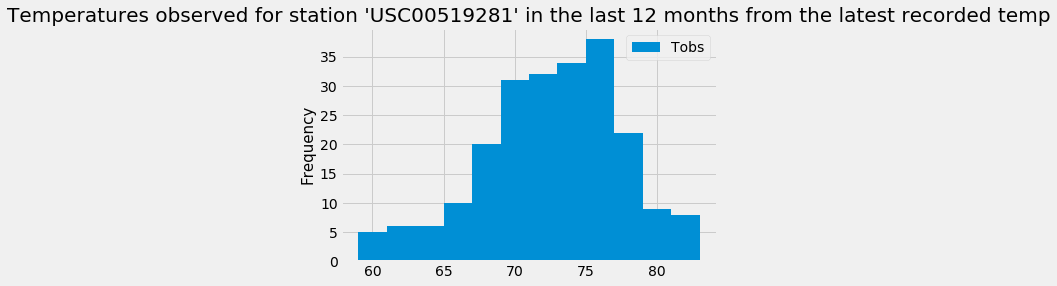

In [21]:
df3 = pd.DataFrame(resultss , columns = ['Tobs'])


df3.hist( bins = 12)

plt.ylabel("Frequency", fontsize = 15)
plt.title("Temperatures observed for station 'USC00519281' in the last 12 months from the latest recorded temp" ,
           size = 20)
labels = ["Tobs"]
plt.legend(labels)


plt.show()

# Close session

In [22]:
# Close Session
session.close()